In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [38]:
from sklearn.metrics import r2_score

In [18]:
df = pd.read_csv("C:/Users/Acer/Desktop/Kaggle/Gold price prediction/gld_price_data.csv")

In [19]:
df.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [20]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [21]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [25]:
df['days_since_ref'] = (df['Date'] - pd.Timestamp('2023-01-01')).dt.days

In [28]:
df['days_since_ref']     ### will use this instead of date

0      -5478
1      -5477
2      -5476
3      -5473
4      -5472
        ... 
2285   -1699
2286   -1698
2287   -1697
2288   -1693
2289   -1691
Name: days_since_ref, Length: 2290, dtype: int64

In [29]:
df.head(2)

,Date,SPX,GLD,USO,SLV,EUR/USD,days_since_ref
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692,-5478
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491,-5477


In [30]:
X = df.drop('GLD', axis  = 1)
X = X.drop('Date', axis = 1)
y = df['GLD']

In [31]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size = 0.1)

In [32]:
rf = RandomForestRegressor()
lr = LinearRegression()

In [35]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [36]:
lr.fit(X_train, y_train)

LinearRegression()

## Random Forest vs Linear Regression

In [39]:
ytest_lr = lr.predict(X_test)
ytest_rf = rf.predict(X_test)

print('r2 for Linear regression:', r2_score(ytest_lr, y_test))
print('r2 for Random Forests:', r2_score(ytest_rf, y_test))

r2 for Linear regression: 0.9028254486483918
r2 for Random Forests: 0.9970753640446097


#### Random forests gave amazing result.

## Some more data analysis:

In [40]:
data  = df.drop('Date', axis = 1)

In [43]:
data.head(2)

,SPX,GLD,USO,SLV,EUR/USD,days_since_ref
0,1447.160034,84.860001,78.470001,15.180,1.471692,-5478
1,1447.160034,85.570000,78.370003,15.285,1.474491,-5477


In [45]:
correlations = data.corr()

<Axes: >

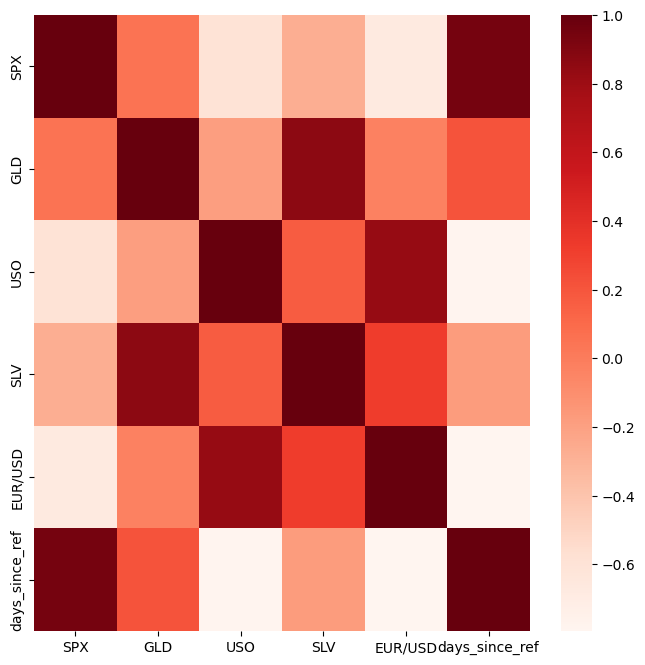

In [53]:
plt.figure(figsize = (8,8))
sns.heatmap(correlations, cbar = 'True', cmap = "Reds")

C:\Users\Acer\AppData\Local\Temp\ipykernel_14840\1673639736.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GLD'])
C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GLD', ylabel='Density'>

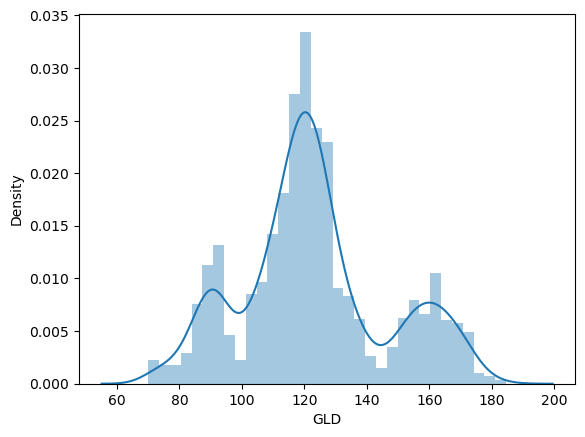

In [58]:
sns.distplot(data['GLD'])

#### The End